In [1]:
from pulp import *
import utils

In [2]:
INSTANCE_NUMBER = 5
ALL_SOLUTIONS = False
ROTATION = True

file_path = f"../instances/ins-{INSTANCE_NUMBER}.txt"
w, n, dims = utils.read_output(file_path)

In [3]:
WIDTH = 0
HEIGHT = 1

In [4]:
upper_bound = sum(dims[:, HEIGHT])
k = 4

In [5]:
prob = LpProblem("VLSI", LpMinimize)

In [6]:
L = LpVariable("L", 0, upper_bound, LpInteger)
pos_x = LpVariable.dicts("pos_x", range(n), 0, w, LpInteger)
pos_y = LpVariable.dicts("pos_y", range(n), 0, upper_bound, LpInteger)

In [7]:
M0 = M1 = w
M2 = M3 = upper_bound

In [8]:
pos_chosen = LpVariable.dict("pos_chosen", (range(n), range(n), range(k)), 0, 1, LpInteger)
rotated = LpVariable.dict("rotated", range(n), 0, 1, LpInteger)

In [9]:
prob += L

In [10]:
"""if ROTATION:
    for i in range(n):
        prob += L >= pos_y[i] + dims[i, HEIGHT]
        for j in range(i + 1, n):
            prob += pos_x[i] + dims[i, WIDTH] <= pos_x[j] + M0 * (pos_chosen[i, j, 0] + rotated[i])
            #prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * (pos_chosen[i, j, 1] + rotated[j, 0])
            prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * (pos_chosen[i, j, 1] + rotated[j])
            prob += pos_y[i] + dims[i, HEIGHT] <= pos_y[j] + M2 * (pos_chosen[i, j, 2] + rotated[i])
            prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * (pos_chosen[i, j, 3] + rotated[j])
            #prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * (pos_chosen[i, j, 3] + rotated[j, 0])
            
            prob += pos_x[i] + dims[i, HEIGHT] <= pos_x[j] + M0 * (pos_chosen[i, j, 0] + (1 - rotated[i]))
            prob += pos_x[j] + dims[j, HEIGHT] <= pos_x[i] + M1 * (pos_chosen[i, j, 1] + (1-rotated[j]))
            prob += pos_y[i] + dims[i, WIDTH] <= pos_y[j] + M2 * (pos_chosen[i, j, 2] + (1-rotated[i]))
            prob += pos_y[j] + dims[j, WIDTH] <= pos_y[i] + M3 * (pos_chosen[i, j, 3] + (1-rotated[j]))
        
            prob += lpSum([pos_chosen[i, j, k] for k in range(k)]) <= 3
            #prob += lpSum(rotated[j,k] for k in range(2)) == 1

           
        if i==(n-1):
                prob += pos_x[i] + dims[j, WIDTH] <= M0 * (pos_chosen[i, i, 0] + rotated[i, 0])
                prob += pos_y[i] + dims[j, HEIGHT] <= M2 * (pos_chosen[i, i, 2] + rotated[i, 0])
                prob += pos_x[i] + dims[i, HEIGHT] <= M1 * (pos_chosen[i, i, 1] + rotated[i,1])
                prob += pos_y[i] + dims[i, WIDTH] <= M3 * (pos_chosen[i, i, 3] + rotated[i,1])  
                prob += lpSum([pos_chosen[i, i, k] for k in range(k)]) <= 3   
                prob += lpSum(rotated[i,k] for k in range(2)) == 1
       """

        

'if ROTATION:\n    for i in range(n):\n        prob += L >= pos_y[i] + dims[i, HEIGHT]\n        for j in range(i + 1, n):\n            prob += pos_x[i] + dims[i, WIDTH] <= pos_x[j] + M0 * (pos_chosen[i, j, 0] + rotated[i])\n            #prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * (pos_chosen[i, j, 1] + rotated[j, 0])\n            prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * (pos_chosen[i, j, 1] + rotated[j])\n            prob += pos_y[i] + dims[i, HEIGHT] <= pos_y[j] + M2 * (pos_chosen[i, j, 2] + rotated[i])\n            prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * (pos_chosen[i, j, 3] + rotated[j])\n            #prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * (pos_chosen[i, j, 3] + rotated[j, 0])\n            \n            prob += pos_x[i] + dims[i, HEIGHT] <= pos_x[j] + M0 * (pos_chosen[i, j, 0] + (1 - rotated[i]))\n            prob += pos_x[j] + dims[j, HEIGHT] <= pos_x[i] + M1 * (pos_chosen[i, j, 1] + (1-rotated[j]))\n            prob += pos_y[i] + d

In [11]:
pos_x

{0: pos_x_0,
 1: pos_x_1,
 2: pos_x_2,
 3: pos_x_3,
 4: pos_x_4,
 5: pos_x_5,
 6: pos_x_6,
 7: pos_x_7}

In [12]:
rotated

{0: rotated_0,
 1: rotated_1,
 2: rotated_2,
 3: rotated_3,
 4: rotated_4,
 5: rotated_5,
 6: rotated_6,
 7: rotated_7}

In [13]:
if ROTATION:
    for i in range(n):
        prob += L >= pos_y[i] + dims[i, HEIGHT]*(1-rotated[i])+ rotated[i]*dims[i, WIDTH]
        for j in range(i + 1, n):
            prob += pos_x[i] + (1-rotated[i])*dims[i, WIDTH] + rotated[i]*dims[i, HEIGHT]<= pos_x[j] + M0 * (pos_chosen[i, j, 0])
            prob += pos_x[j] + (1-rotated[j])*dims[j, WIDTH] + rotated[j]*dims[j, HEIGHT] <= pos_x[i] + M1 * (pos_chosen[i, j, 1])
            prob += pos_y[i] + (1-rotated[i])*dims[i, HEIGHT] + rotated[i]*dims[i, WIDTH]<= pos_y[j] + M2 * (pos_chosen[i, j, 2])
            prob += pos_y[j] + (1-rotated[j])*dims[j, HEIGHT] + rotated[j]*dims[j, WIDTH]<= pos_y[i] + M3 * (pos_chosen[i, j, 3])
            prob += lpSum([pos_chosen[i, j, k] for k in range(k)]) <= 3

    prob += pos_x[n-1] + (1-rotated[n-1])*dims[n-1, WIDTH] + rotated[n-1]*dims[n-1, HEIGHT] <= M1   
   

In [14]:
if not ROTATION:
    for i in range(n):
        prob += L >= pos_y[i] + dims[i, HEIGHT]
        for j in range(i + 1, n):
            prob += pos_x[i] + dims[i, WIDTH] <= pos_x[j] + M0 * pos_chosen[i, j, 0]
            prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * pos_chosen[i, j, 1]
            prob += pos_y[i] + dims[i, HEIGHT] <= pos_y[j] + M2 * pos_chosen[i, j, 2]
            prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * pos_chosen[i, j, 3]
            prob += lpSum([pos_chosen[i, j, k] for k in range(k)]) <= k - 1


In [15]:
status = prob.solve()

In [ ]:
LpStatus[status]

'Optimal'

In [ ]:
print(f"value of L: {value(L)}")
sol = []
sol.append([w, value(L)])
sol.append([n])
for i in range(n):
    print(i)
    
    width = dims[i, int(value(rotated[i]))]
    height = dims[i, 1-int(value(rotated[i]))]
    
    sol.append([width, height, int(value(pos_x[i])), int(value(pos_y[i]))])
    print(value(pos_x[i]), value(pos_y[i]))

value of L: 11.0
0
8.0 0.0
1
8.0 7.0
2
0.0 0.0
3
0.0 5.0
4
3.0 0.0
5
3.0 7.0
6
3.0 3.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import math
import os

def visualize_output(output, dims):
    w = output[0][0]
    l = output[0][1]
    n = output[1][0]

    colors = np.array(['red', 'green', 'blue', 'yellow', 'orange', 'pink', 'purple', 'brown']*(math.ceil(n/8)))


    fig = plt.figure(figsize=(w/2, l/2))
    ax = fig.gca()
    ax.set_xticks(np.arange(0, w+1, 1))
    ax.set_yticks(np.arange(0, l+1, 1))
    plt.grid()
    for i, [width, height, x, y] in enumerate(np.array(output[2:])):
        rect = patches.Rectangle((x, y), width, height, linewidth=3, edgecolor='black', facecolor=colors[i])
        ax.add_patch(rect)
        if (width != dims[i, 0]):
            ax.text(x+width/2-0.7, y+height/2, 'Rotated')
    plt.show()
    return fig

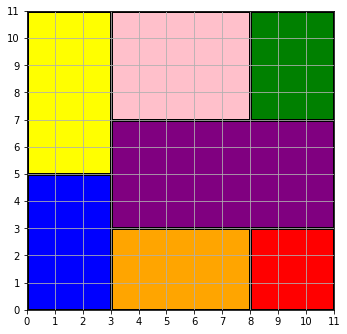

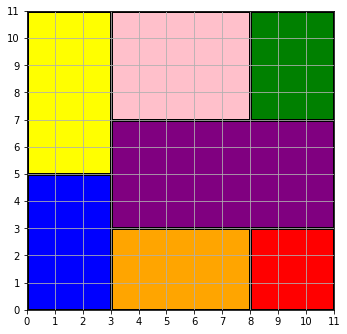

In [ ]:
visualize_output(sol, dims)